## Data Cleaning

In [23]:
import statsmodels.stats.power as smp
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import os
import re 

In [24]:
from Data_cleaning import *

columns=['Name', 'Features', 'Location', 'Price', "Seller", "Auction_Type", "Date"] 
data_files = os.listdir("Data")
data_files.remove('.DS_Store')
data_path = "Data/"
print(data_files)

[Errno 2] No such file or directory: '/content/'
/Users/saahiljain/Downloads/Project/Car_Predictor
Cloning into 'Car_Predictor'...
[Errno 2] No such file or directory: '/content/'
/Users/saahiljain/Downloads/Project/Car_Predictor
Cloning into 'Car_Predictor'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Enumerating objects: 88, done.[K
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (59/59), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 88 (delta 46), reused 66 (delta 27), pack-reused 0
Receiving objects: 100% (88/88), 991.01 KiB | 5.00 MiB/s, done.
remote: Total 88 (delta 46), reused 66 (delta 27), pack-reused 0
Receiving objects: 100% (88/88), 991.01 KiB | 5.00 MiB/s, done.
Resolving deltas: 100% (46/46), done.
Resolving deltas: 100% (46/46), done.
/Users/saahiljain/Downloads/Project/Car_Predictor/Car_Predictor
/Users/saahiljain/Downloads/Project/Car_Predictor/Car_Predictor
hint: 

In [25]:
df_file = data_path + "Porsche_911.csv"
df = pd.read_csv(df_file, names=columns, header=None)

print("Raw Data")
print(df.shape)
x = clean_features(df)
x = clean_date(x)
x = clean_prices(x)
x = clean_name(x)
x = binarize_auctiontype(x)
x = binarize_transmission(x)
x = binarize_drive_side(x)
x.head(50)
print(x.isnull().sum())

x = x[x['Location'].notna()]
x = x[x['Price'].notna()]
x = x[x['Seller'].notna()]
x = x[x['Mileage'].notna()]
x = x[x['Condition'].notna()]
x = x[x['Date'].notna()]
print("\nPost Cleaning")
print(x.shape)
x.isnull().sum()

x = x[x["Price"]<=400_000]


Raw Data
(12725, 7)
Raw Data
(12725, 7)
Location              220
Price                 658
Seller                  2
Date                    2
Mileage              2473
Condition            5758
NameOfModel             0
YearOfManufacture       0
Cabriolet               0
Coupe                   0
GT                      0
AuctionType             2
Transmission_type    1413
DriveSide            4071
dtype: int64

Post Cleaning
(5372, 14)
Location              220
Price                 658
Seller                  2
Date                    2
Mileage              2473
Condition            5758
NameOfModel             0
YearOfManufacture       0
Cabriolet               0
Coupe                   0
GT                      0
AuctionType             2
Transmission_type    1413
DriveSide            4071
dtype: int64

Post Cleaning
(5372, 14)


## Condition Effect

In [26]:
x["Condition"].value_counts()

Original & Highly Original    3913
Modified                       559
Restored-Original              299
Restomod & Custom              222
Restored-Modified               94
Restored                        51
Project                         20
Unable to Determine              3
Name: Condition, dtype: int64

Original & Highly Original    3913
Modified                       559
Restored-Original              299
Restomod & Custom              222
Restored-Modified               94
Restored                        51
Project                         20
Unable to Determine              3
Name: Condition, dtype: int64

Text(0, 0.5, 'Price')

Text(0, 0.5, 'Price')

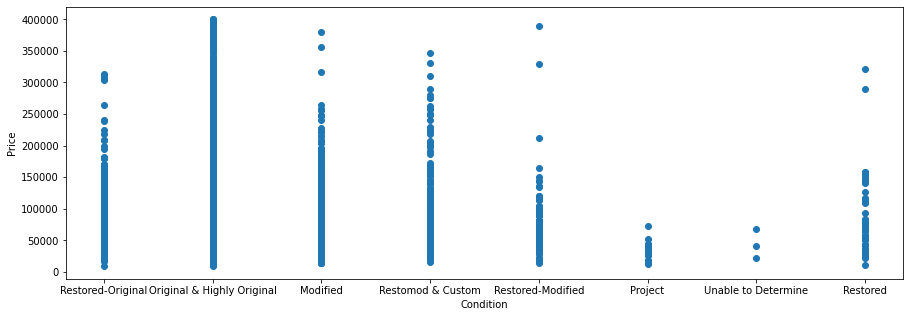

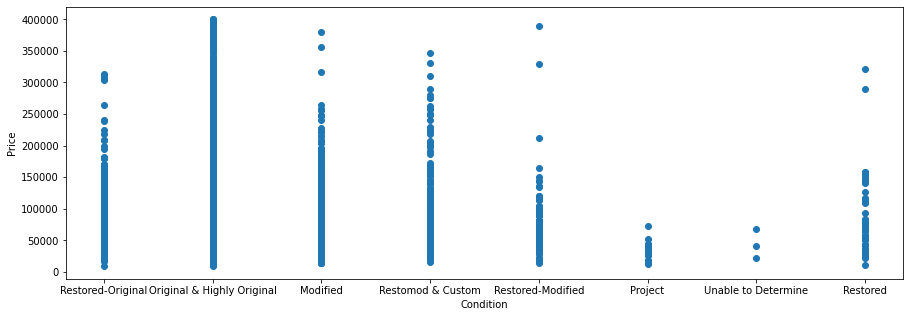

In [27]:
plt.figure(figsize=(15,5))
plt.scatter(x["Condition"], x["Price"])
plt.xlabel('Condition')
plt.ylabel('Price')

Text(0.5, 0, 'Modified                                          Restored-Original                                   Restomod & Custom                           Original & Highly Original')

Text(0.5, 0, 'Modified                                          Restored-Original                                   Restomod & Custom                           Original & Highly Original')

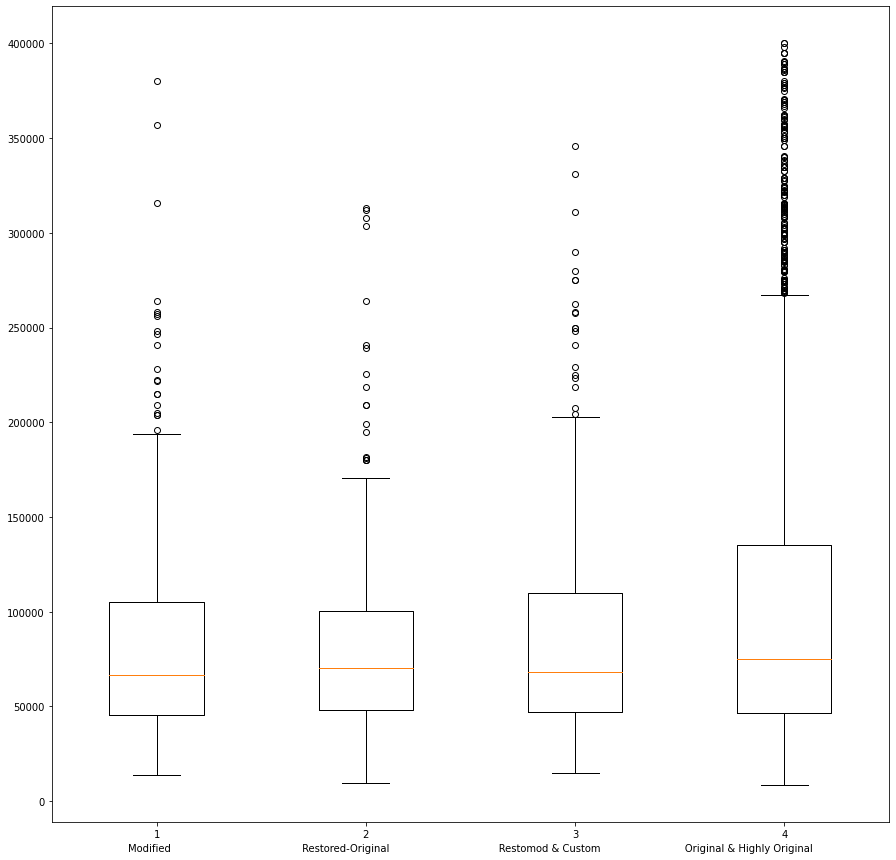

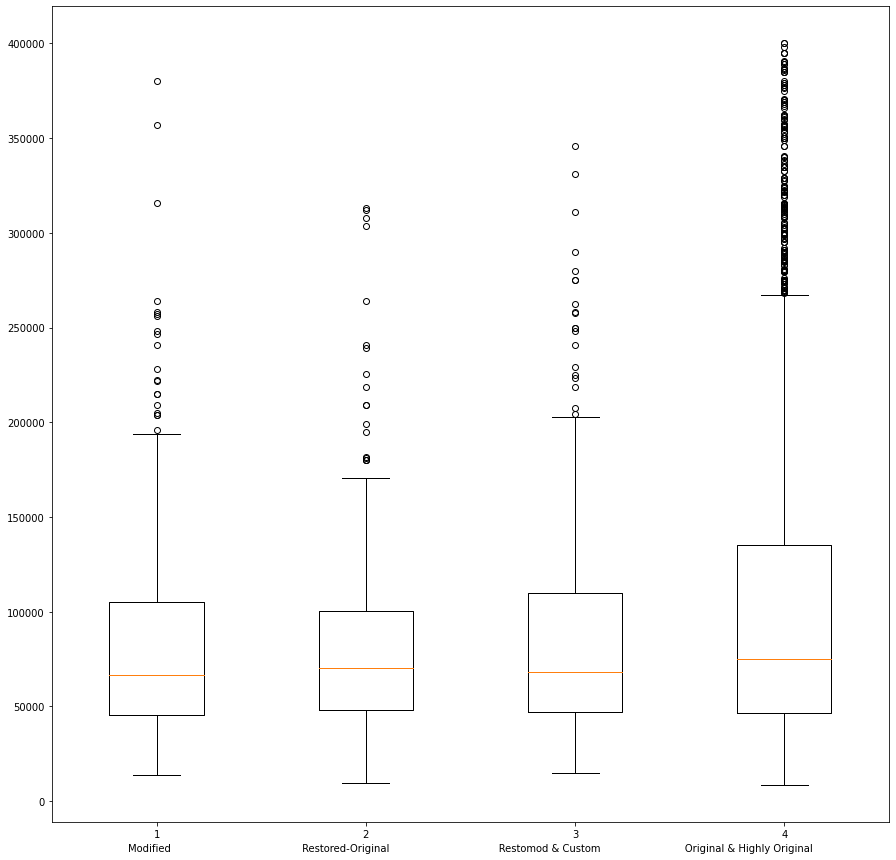

In [28]:
y = x.groupby("Condition")
conditions = ["Modified", "Restored-Original", "Restomod & Custom", "Original & Highly Original"]
distributions = {}
labels = []
plot_data = []
for condition, data in y:
  if condition in conditions:
    distributions[condition] = data["Price"].values
    plot_data.append(data["Price"].values)
    labels.append(condition)
plt.figure(figsize=(15,15))
plt.boxplot([distributions[conditions[0]], distributions[conditions[1]], distributions[conditions[2]], distributions[conditions[3]]])
plt.xlabel("Modified                                          Restored-Original                                   Restomod & Custom                           Original & Highly Original") 

In [29]:
not_modified = list(distributions["Restored-Original"])+ list(distributions["Restomod & Custom"]) + list(distributions["Original & Highly Original"])
modified = list(distributions["Modified"])

m1=np.mean(modified)
std1=np.std(modified)
m2=np.mean(not_modified)
std2=np.std(not_modified)
sdPooled=np.sqrt(((std1**2)+(std2**2))/2)
cohen=(m2-m1)/sdPooled
print("Modified VS Not Modified",)
print("COHEN'S D           :",cohen)
numberOfObservations=len(modified)
print("CORRESPONDING POWER :",smp.ttest_power(cohen,nobs=numberOfObservations, alpha=0.005))
a,p = stats.ttest_ind(modified, not_modified)
print("P value             :",p,end="\n\n")

Modified VS Not Modified
COHEN'S D           : 0.26882657671570076
CORRESPONDING POWER : 0.999789325081021
P value             : 1.104175574949569e-07

Modified VS Not Modified
COHEN'S D           : 0.26882657671570076
CORRESPONDING POWER : 0.999789325081021
P value             : 1.104175574949569e-07



In [30]:
Description = """
Original & Highly Original - Vehicles that are original or close to original factory specifications, irrespective of condition. May include vehicles that have minor, removable modifications such as aftermarket wheels, exhaust, or accessories such as cargo/roof rack, stereos, etc.
Modified - Vehicles with a period-correct engine and body, with multiple removable modifications such as increaced displacement, added performance equipment (turbo, supercharger, headers), transmission swaps, bumpers, or bbody wraps.
Restored-Original - Vehicles that are restored to original or close to original factory specifications. May include vehicles with color changes, and/or minor removable modifications, but preserve their original engine specifications and body configuration.
Restomod & Custom - Highly modified and/or Restored vehicles with uprated, non-period correct engine swaps, or engines from outside the original manufacturer, and/or vehicles with significant body customizations or conversions. Generally, Restomod and Custom vehicles cannot be easily returned to their original factory specifications.
"""
for i in range(len(conditions)-1):
  for j in range(i+1,len(conditions)):
    print(conditions[i]," VS ",conditions[j])
    a,p = stats.ttest_ind(distributions[conditions[i]], distributions[conditions[j]], alternative="less")
    print("P value             :",p)
    print()

Modified  VS  Restored-Original
P value             : 0.3566686365180432

Modified  VS  Restomod & Custom
P value             : 0.022970113847842432

Modified  VS  Original & Highly Original
P value             : 6.977030351297156e-09

Restored-Original  VS  Restomod & Custom
P value             : 0.06972234731442646

Restored-Original  VS  Original & Highly Original
P value             : 4.5118753596640966e-05

Restomod & Custom  VS  Original & Highly Original
P value             : 0.027279338625781892

Modified  VS  Restored-Original
P value             : 0.3566686365180432

Modified  VS  Restomod & Custom
P value             : 0.022970113847842432

Modified  VS  Original & Highly Original
P value             : 6.977030351297156e-09

Restored-Original  VS  Restomod & Custom
P value             : 0.06972234731442646

Restored-Original  VS  Original & Highly Original
P value             : 4.5118753596640966e-05

Restomod & Custom  VS  Original & Highly Original
P value             : 0.

###POWER ANALYSIS FOR MODIFIED VS OTHER CATEGORIES

In [31]:
not_modified = list(distributions["Restored-Original"])+ list(distributions["Restomod & Custom"]) + list(distributions["Original & Highly Original"])
modified = list(distributions["Modified"])

m1=np.mean(modified)
std1=np.std(modified)
m2=np.mean(not_modified)
std2=np.std(not_modified)
sdPooled=np.sqrt(((std1**2)+(std2**2))/2)
cohen=(m2-m1)/sdPooled
print("Modified VS Not Modified",)
print("COHEN'S D           :",cohen)
numberOfObservations=len(modified)
print("CORRESPONDING POWER :",smp.ttest_power(cohen,nobs=numberOfObservations, alpha=0.005, alternative='larger'))
a,p = stats.ttest_ind(modified, not_modified, alternative="less")
print("P value             :",p,end="\n\n")

Modified VS Not Modified
COHEN'S D           : 0.26882657671570076
CORRESPONDING POWER : 0.9999153945265631
P value             : 5.520877874747845e-08

Modified VS Not Modified
COHEN'S D           : 0.26882657671570076
CORRESPONDING POWER : 0.9999153945265631
P value             : 5.520877874747845e-08



In [32]:
m1=np.mean(distributions[conditions[0]])
std1=np.std(distributions[conditions[0]])
for i in range(3):
    m2=np.mean(distributions[conditions[i+1]])
    std2=np.std(distributions[conditions[i+1]])
    sdPooled=np.sqrt(((std1**2)+(std2**2))/2)
    cohen=(m2-m1)/sdPooled
    print(conditions[0]," VS ",conditions[i+1])
    print("COHEN'S D           :",cohen)
    numberOfObservations=len(distributions[conditions[0]])
    print("CORRESPONDING POWER :",smp.ttest_power(cohen,nobs=numberOfObservations, alpha=0.005, alternative='larger'))
    a,p = stats.ttest_ind(distributions[conditions[0]], distributions[conditions[i+1]], alternative="less")
    print("P value             :",p,end="\n\n")

Modified  VS  Restored-Original
COHEN'S D           : 0.026450714491698658
CORRESPONDING POWER : 0.02545091825208312
P value             : 0.3566686365180432

Modified  VS  Restomod & Custom
COHEN'S D           : 0.15091063352840467
CORRESPONDING POWER : 0.836842709776948
P value             : 0.022970113847842432

Modified  VS  Original & Highly Original
COHEN'S D           : 0.2903489425296498
CORRESPONDING POWER : 0.9999999999966701
P value             : 6.977030351297156e-09

Modified  VS  Restored-Original
COHEN'S D           : 0.026450714491698658
CORRESPONDING POWER : 0.02545091825208312
P value             : 0.3566686365180432

Modified  VS  Restomod & Custom
COHEN'S D           : 0.15091063352840467
CORRESPONDING POWER : 0.836842709776948
P value             : 0.022970113847842432

Modified  VS  Original & Highly Original
COHEN'S D           : 0.2903489425296498
CORRESPONDING POWER : 0.9999999999966701
P value             : 6.977030351297156e-09



## Milage Effect

Text(0, 0.5, 'Price')

Text(0, 0.5, 'Price')

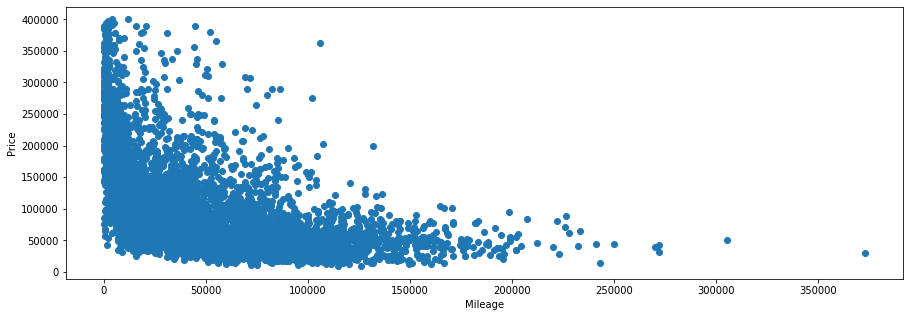

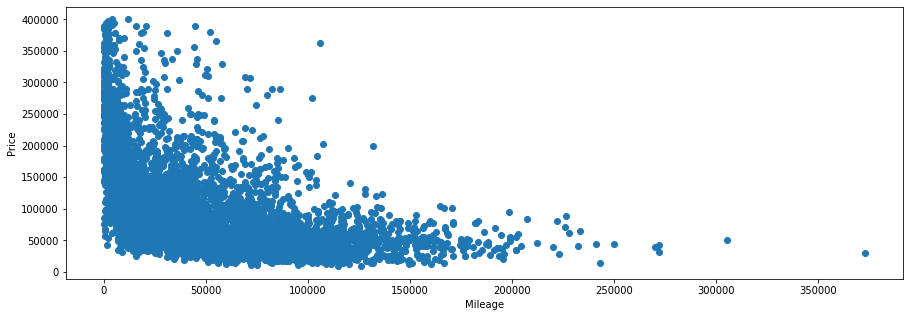

In [33]:
plt.figure(figsize=(15,5))
plt.scatter(x["Mileage"], x["Price"])
plt.xlabel('Mileage')
plt.ylabel('Price')

In [34]:
prices = pd.to_numeric(x['Price'], errors='coerce').values
mileage = pd.to_numeric(x['Mileage'], errors='coerce').values

print("Low Mileage VS High Mileage")
med_mile = np.median(mileage)
low_mile_prices = prices[np.where(mileage < med_mile)]
high_mile_prices = prices[np.where(mileage > med_mile)]
t,p = stats.ttest_ind(low_mile_prices, high_mile_prices)
print(p)

Low Mileage VS High Mileage
2.3162554658764753e-275
Low Mileage VS High Mileage
2.3162554658764753e-275


In [35]:
prices = pd.to_numeric(x['Price'], errors='coerce').values
mileage = pd.to_numeric(x['Mileage'], errors='coerce').values
print("Low Mileage VS High Mileage")
med_mile = np.median(mileage)
low_mile_prices = prices[np.where(mileage < med_mile)]
high_mile_prices = prices[np.where(mileage > med_mile)]
t,p = stats.ttest_ind(low_mile_prices, high_mile_prices, alternative='greater')
print(p)

Low Mileage VS High Mileage
1.1581277329382376e-275
Low Mileage VS High Mileage
1.1581277329382376e-275


###POWER ANALYSIS FOR LOW MILEAGE VS HIGH MILEAGE

In [36]:
lowPriceMean=np.mean(low_mile_prices)
highPriceMean=np.mean(high_mile_prices)
sdForLow=np.std(low_mile_prices)
sdForHigh=np.std(high_mile_prices)
sdPooled=np.sqrt(((sdForLow**2)+(sdForHigh**2))/2)
cohen=(lowPriceMean-highPriceMean)/sdPooled
print("Mileage Effect")
print("COHEN'S D           :",cohen)
print("CORRESPONDING POWER :",smp.ttest_power(cohen, nobs=2686, alpha=0.005, alternative='larger'))
t,p = stats.ttest_ind(low_mile_prices, high_mile_prices, alternative='greater')
print("P value             :",p)

Mileage Effect
COHEN'S D           : 1.0507664161270769
CORRESPONDING POWER : 1.0
P value             : 1.1581277329382376e-275
Mileage Effect
COHEN'S D           : 1.0507664161270769
CORRESPONDING POWER : 1.0
P value             : 1.1581277329382376e-275


## Seller Effect

In [37]:
x["Seller"].value_counts()

Bring a Trailer               2759
PCARMARKET                     886
Mecum                          202
Cars & Bids                    165
RM Sotheby's                    65
The Market by Bonhams           64
Bonhams                         51
Silverstone (UK)                45
Historics (UK)                  44
Gooding & Company               44
CCA Everyman Classics (UK)      24
Barrett-Jackson                 16
Catawiki                        16
Artcurial (EU)                  14
H&H Auctioneers UK              12
Broad Arrow                     11
AutoHunter                       8
Worldwide Auctioneers            8
Marqued                          6
Hemmings                         5
GAA                              5
Gateway Classic Cars             4
ACC Auctions                     4
Saratoga Motorcar Auctions       3
Barons                           2
Henderson Motor Series           2
Aguttes                          2
ShiftGate                        2
P1 Groupe           

Bring a Trailer               2759
PCARMARKET                     886
Mecum                          202
Cars & Bids                    165
RM Sotheby's                    65
The Market by Bonhams           64
Bonhams                         51
Silverstone (UK)                45
Historics (UK)                  44
Gooding & Company               44
CCA Everyman Classics (UK)      24
Barrett-Jackson                 16
Catawiki                        16
Artcurial (EU)                  14
H&H Auctioneers UK              12
Broad Arrow                     11
AutoHunter                       8
Worldwide Auctioneers            8
Marqued                          6
Hemmings                         5
GAA                              5
Gateway Classic Cars             4
ACC Auctions                     4
Saratoga Motorcar Auctions       3
Barons                           2
Henderson Motor Series           2
Aguttes                          2
ShiftGate                        2
P1 Groupe           

Text(0, 0.5, 'Price')

Text(0, 0.5, 'Price')

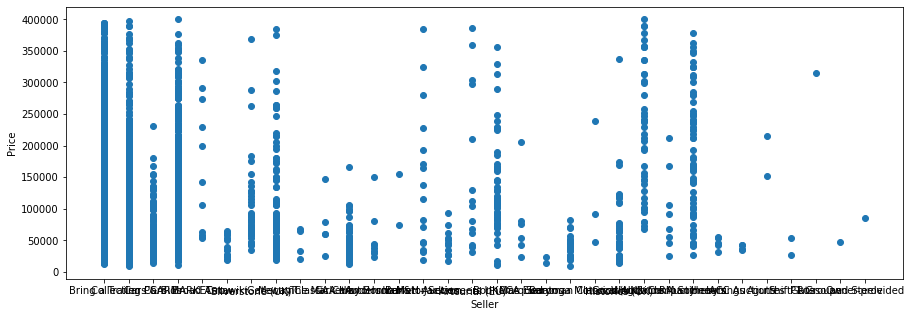

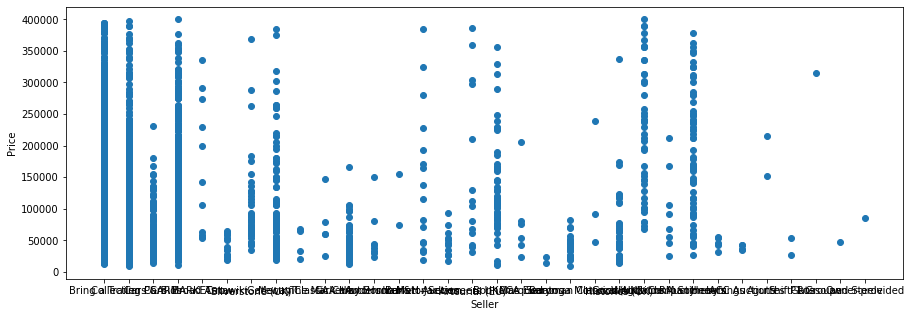

In [38]:
plt.figure(figsize=(15,5))
plt.scatter(x["Seller"], x["Price"])
plt.xlabel('Seller')
plt.ylabel('Price')

Text(0.5, 0, "['PCARMARKET', 'Bring a Trailer', 'Collecting Cars', 'Mecum']")

Text(0.5, 0, "['PCARMARKET', 'Bring a Trailer', 'Collecting Cars', 'Mecum']")

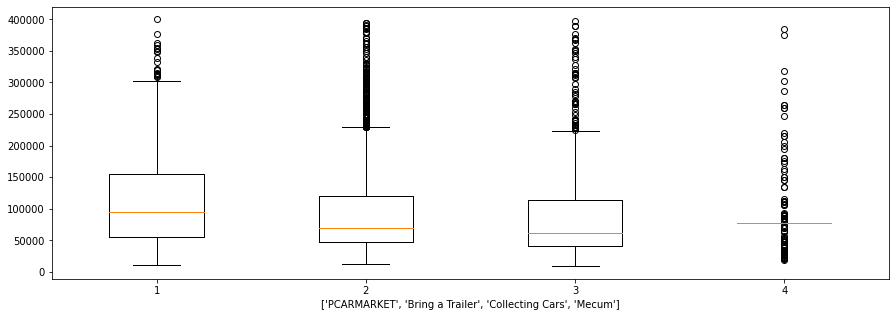

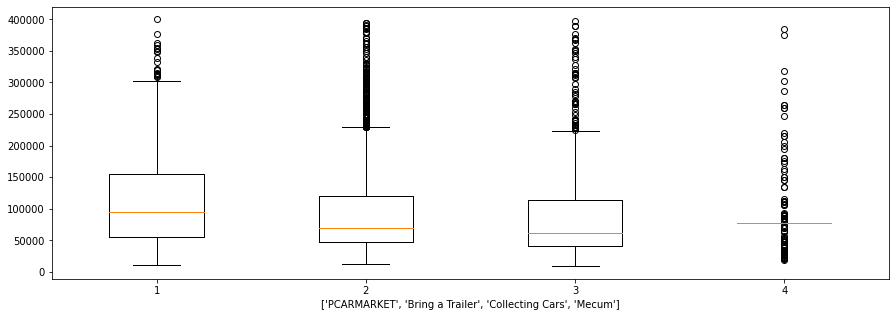

In [39]:
y = x.groupby("Seller")
sellers = ["PCARMARKET", "Bring a Trailer", "Collecting Cars", "Mecum"]
distributions = {}
labels = []
plot_data = []
for seller, data in y:
  if seller in sellers:
    distributions[seller] = data["Price"].values
    plot_data.append(data["Price"].values)
    labels.append(seller)
plt.figure(figsize=(15,5))
plt.boxplot([distributions[sellers[0]], distributions[sellers[1]], distributions[sellers[2]], distributions[sellers[3]]])
plt.xlabel(sellers)

In [40]:
#TWO SIDED
for i in range(len(sellers)-1):
  for j in range(i+1,len(sellers)):
    print(sellers[i]," VS ",sellers[j])
    a,p = stats.ttest_ind(distributions[sellers[i]], distributions[sellers[j]])
    print(p)
    print()

PCARMARKET  VS  Bring a Trailer
1.0927579417344258e-13

PCARMARKET  VS  Collecting Cars
1.0943867818589632e-09

PCARMARKET  VS  Mecum
4.0695561623519096e-05

Bring a Trailer  VS  Collecting Cars
0.2840364378836637

Bring a Trailer  VS  Mecum
0.5384205668677795

0.980262558525639

PCARMARKET  VS  Bring a Trailer
1.0927579417344258e-13

PCARMARKET  VS  Collecting Cars
1.0943867818589632e-09

PCARMARKET  VS  Mecum
4.0695561623519096e-05

Bring a Trailer  VS  Collecting Cars
0.2840364378836637

Bring a Trailer  VS  Mecum
0.5384205668677795

0.980262558525639



In [41]:
#ONE SIDED
for i in range(len(sellers)-1):
  for j in range(i+1,len(sellers)):
    print(sellers[i]," VS ",sellers[j])
    a,p = stats.ttest_ind(distributions[sellers[i]], distributions[sellers[j]], alternative="greater") #PCAMARKET SELLS BETTER
    print(p)
    print()

PCARMARKET  VS  Bring a Trailer
5.463789708672129e-14

PCARMARKET  VS  Collecting Cars
5.471933909294816e-10

PCARMARKET  VS  Mecum
2.0347780811759548e-05

Bring a Trailer  VS  Collecting Cars
0.14201821894183184

Bring a Trailer  VS  Mecum
0.26921028343388975

0.5098687207371805

PCARMARKET  VS  Bring a Trailer
5.463789708672129e-14

PCARMARKET  VS  Collecting Cars
5.471933909294816e-10

PCARMARKET  VS  Mecum
2.0347780811759548e-05

Bring a Trailer  VS  Collecting Cars
0.14201821894183184

Bring a Trailer  VS  Mecum
0.26921028343388975

0.5098687207371805



###POWER ANALYSIS FOR SELLERS

In [42]:
m1=np.mean(distributions[sellers[0]])
std1=np.std(distributions[sellers[0]])
for i in range(3):
  m2=np.mean(distributions[sellers[i+1]])
  std2=np.std(distributions[sellers[1]])
  sdPooled=np.sqrt(((std1**2)+(std2**2))/2)
  cohen=(m1-m2)/sdPooled


  print(sellers[0],"VS",sellers[i+1])
  print("COHEN'S D           :",cohen)
  numberOfObservations=len(distributions[sellers[0]])
  print("CORRESPONDING POWER :",smp.ttest_power(cohen,nobs=numberOfObservations, alpha=0.005, alternative='larger'))
  a,p = stats.ttest_ind(distributions[sellers[0]], distributions[sellers[i+1]], alternative="greater") 
  print("P value             :",p,end="\n\n")

PCARMARKET VS Bring a Trailer
COHEN'S D           : 0.28148048770561956
CORRESPONDING POWER : 1.0
P value             : 5.463789708672129e-14

PCARMARKET VS Collecting Cars
COHEN'S D           : 0.3259672078618905
CORRESPONDING POWER : 1.0
P value             : 5.471933909294816e-10

PCARMARKET VS Mecum
COHEN'S D           : 0.3239757605595791
CORRESPONDING POWER : 1.0
P value             : 2.0347780811759548e-05

PCARMARKET VS Bring a Trailer
COHEN'S D           : 0.28148048770561956
CORRESPONDING POWER : 1.0
P value             : 5.463789708672129e-14

PCARMARKET VS Collecting Cars
COHEN'S D           : 0.3259672078618905
CORRESPONDING POWER : 1.0
P value             : 5.471933909294816e-10

PCARMARKET VS Mecum
COHEN'S D           : 0.3239757605595791
CORRESPONDING POWER : 1.0
P value             : 2.0347780811759548e-05



In [43]:
from pandas._libs.hashtable import value_count
y = x.groupby("Condition")
sellers = ["PCARMARKET", "Bring a Trailer", "Collecting Cars", "Mecum"]
conditions = ["Modified", "Restored-Original", "Restomod & Custom", "Original & Highly Original"]
plot_data = []
seller_data = {"PCARMARKET":{}, "Bring a Trailer":{}, "Collecting Cars":{}, "Mecum":{}}
for condition, data in y:
  if condition in conditions:
    seller_counts = data["Seller"].value_counts()
    # print(condition)
    for seller in sellers:
      if seller in seller_counts:
        seller_data[seller][condition] = seller_counts[seller]
        # print(seller,":", seller_counts[seller])
    # print()

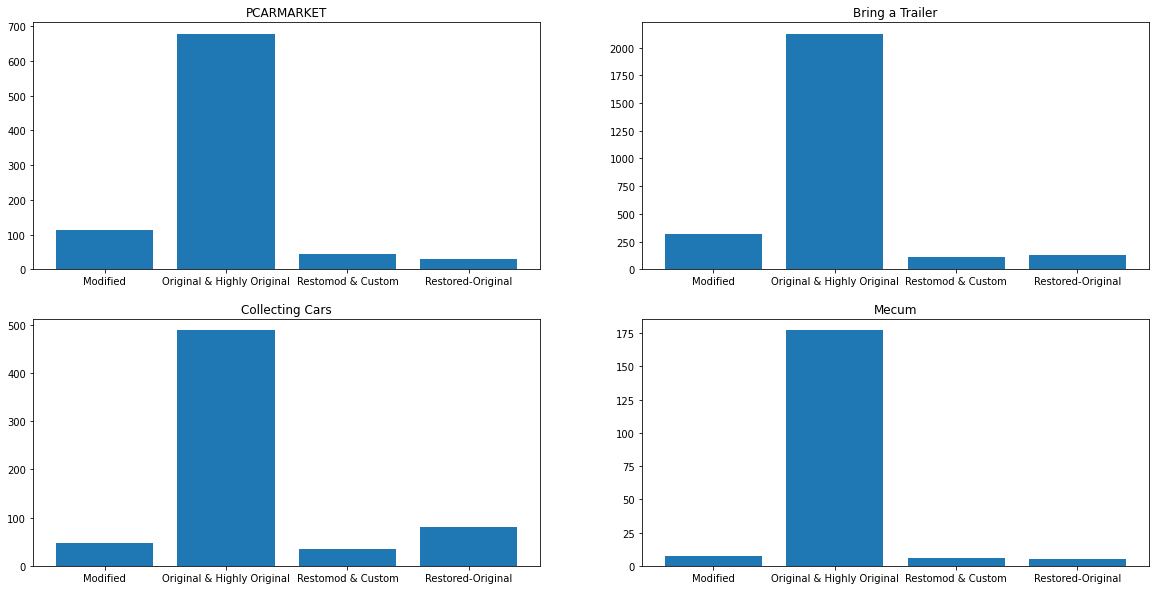

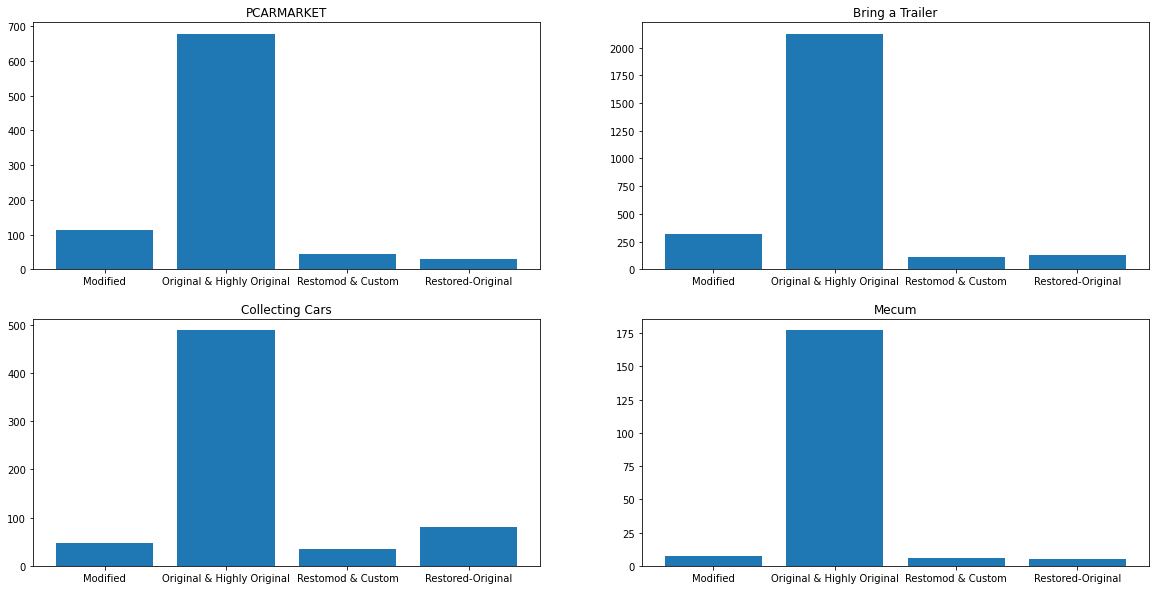

In [44]:
figure, axis = plt.subplots(2, 2, figsize=(20,10))
# plt.figure(figsize=(15,15))
index = 0
for seller in sellers:
  axis[index//2, index%2].bar(seller_data[seller].keys(), seller_data[seller].values())
  axis[index//2, index%2].set_title(seller)
  index+=1